In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# reference
# https://towardsdatascience.com/image-processing-with-python-unsupervised-learning-for-image-segmentation-90ebd23d91a4

# https://towardsdatascience.com/image-color-segmentation-by-k-means-clustering-algorithm-5792e563f26e

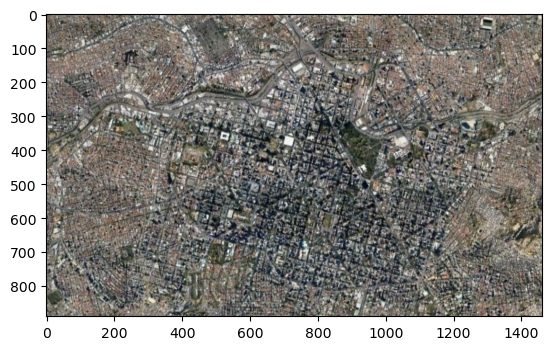

In [40]:
image = Image.open('centro_bh.png')
# Define the downsampling factor
downsample_factor = 1

# Downsample the image
downsampled_image = image.resize((image.width // downsample_factor, image.height // downsample_factor))

#downsampled_image = downsampled_image.convert("HSV")
downsampled_image = downsampled_image.convert("RGB")
pixel_array = np.array(downsampled_image)
plt.imshow(downsampled_image)

In [41]:
height, width, _ = pixel_array.shape
pixels = pixel_array.reshape(height * width, 3) / 255

r = pixels[:,0]
g = pixels[:,1]
b = pixels[:,2]

In [42]:
pixels.shape

(1301180, 3)

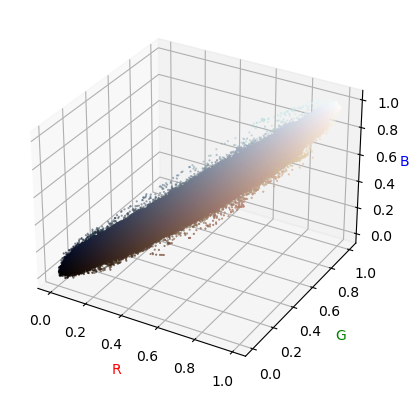

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(r, g, b, c=pixels, s=1, marker='.')
ax.set_xlabel('R', color='r')
ax.set_ylabel('G', color='g')
ax.set_zlabel('B', color='b')
ax.zaxis.labelpad=-0.7
plt.show()

In [19]:
# Iteration and metrics
X = pixels
metrics = {'wcss': [],
           'silhouette': [],
           'db_index': [],
           'ch_index': []}
labels = []
cluster_centers = []
n_clusters = 7  # upper range of clusters to test
for k in range(2, n_clusters):
    # Kmeans fit
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(X)
    labels.append(kmeans.labels_)
    cluster_centers.append(kmeans.cluster_centers_)

    # Within cluster sum of squares
    metrics['wcss'].append(kmeans.inertia_)

    # Silhouette coefficient
    silhouette = silhouette_score(X, labels[-1])
    metrics['silhouette'].append(silhouette)

    # Davies-Bouldin index
    db_index = davies_bouldin_score(X, labels[-1])
    metrics['db_index'].append(db_index)

    # Calinski-Harabasz index
    ch_index = calinski_harabasz_score(X, labels[-1])
    metrics['ch_index'].append(ch_index)

    print(f'{k}/{n_clusters-1} done')

2/6 done
3/6 done
4/6 done
5/6 done
6/6 done


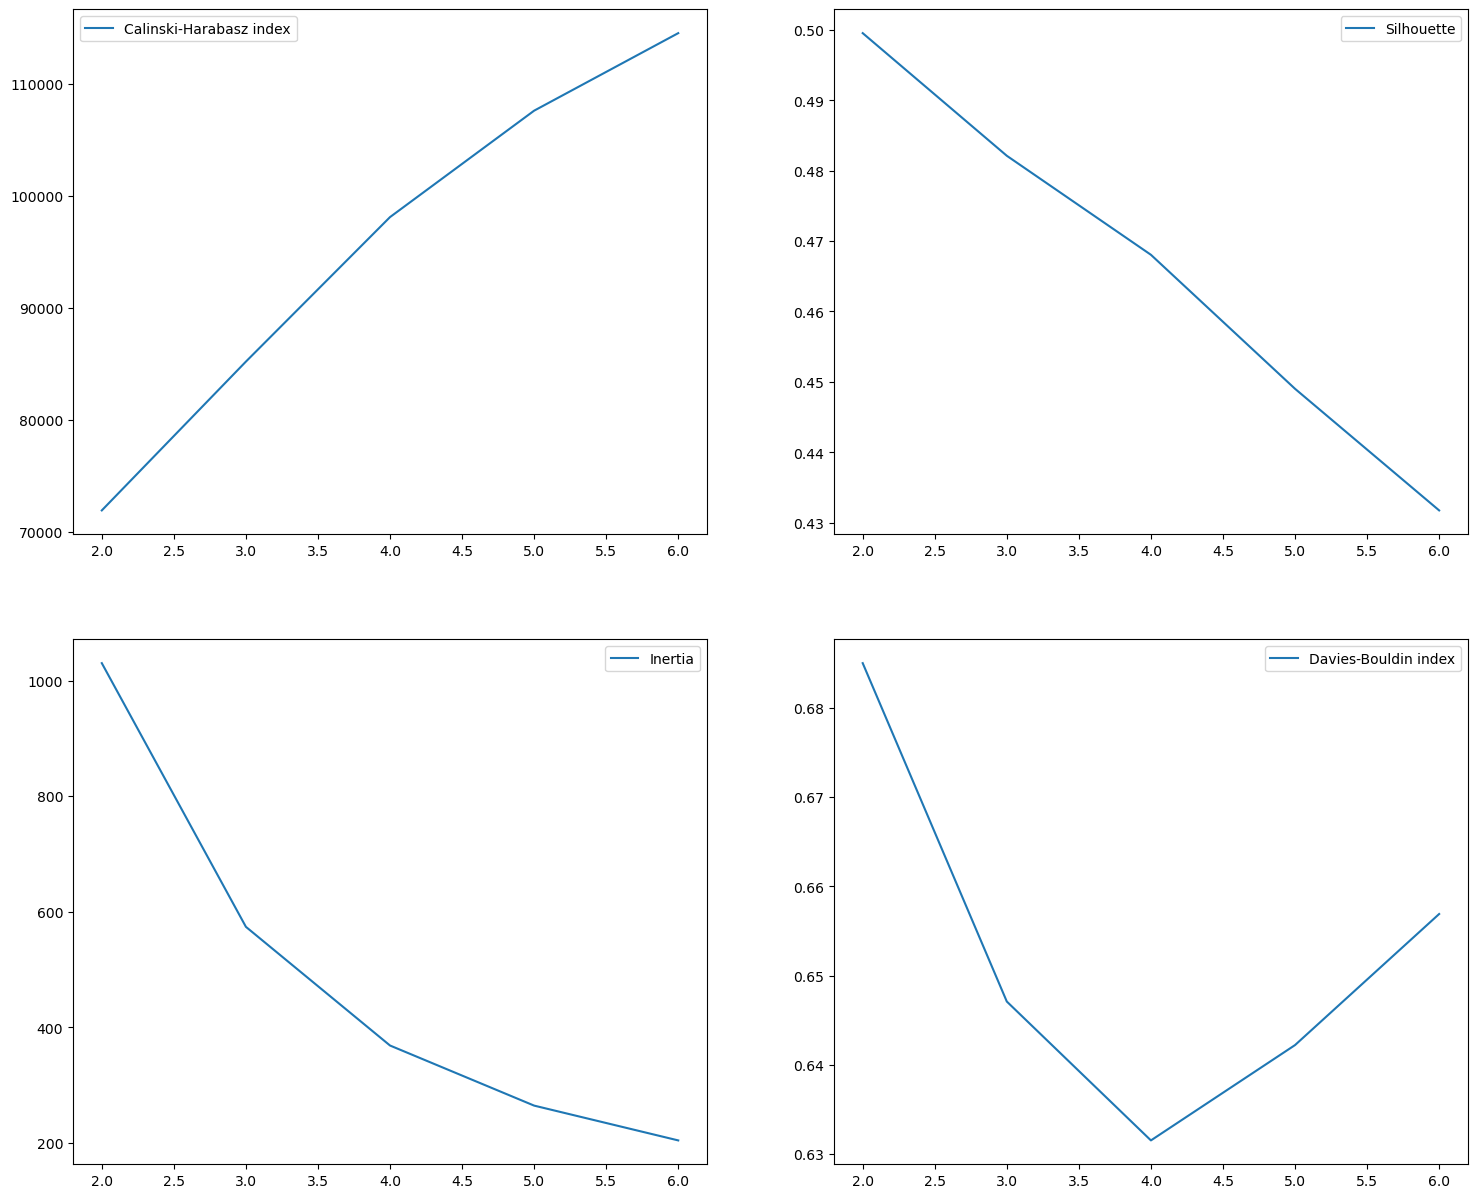

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
ax = axes.flatten()
# the higher, the better
ax[0].plot(range(2,n_clusters), metrics['ch_index'], label='Calinski-Harabasz index')
ax[1].plot(range(2, n_clusters), metrics['silhouette'], label='Silhouette')

# lower is better
ax[2].plot(range(2,n_clusters), metrics['wcss'], label='Inertia')
ax[3].plot(range(2, n_clusters), metrics['db_index'], label='Davies-Bouldin index')

for a in ax:
    a.legend()

In [49]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', algorithm='elkan').fit(pixels)

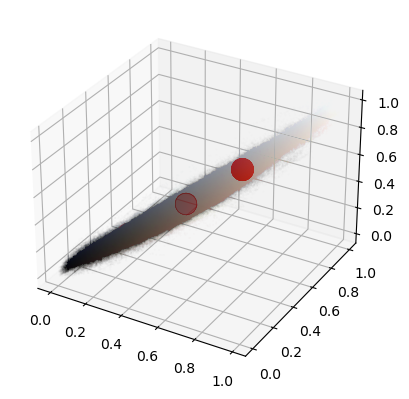

In [50]:
centers = kmeans.cluster_centers_

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(r, g, b, c=pixels, s=1, marker='.', alpha=0.01)
ax.scatter(centers[:,0], centers[:,1], centers[:,2], c='red', s=256)
plt.show()

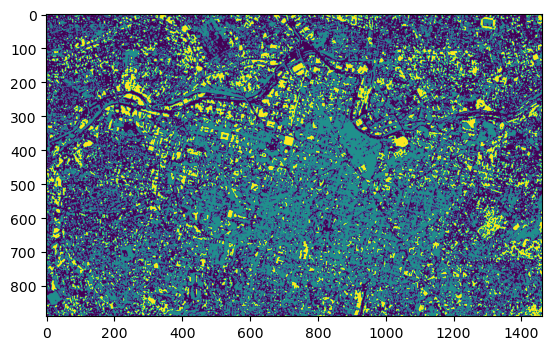

In [51]:
result = kmeans.labels_.reshape(height,width)
plt.imshow(result, cmap='viridis')
plt.show()

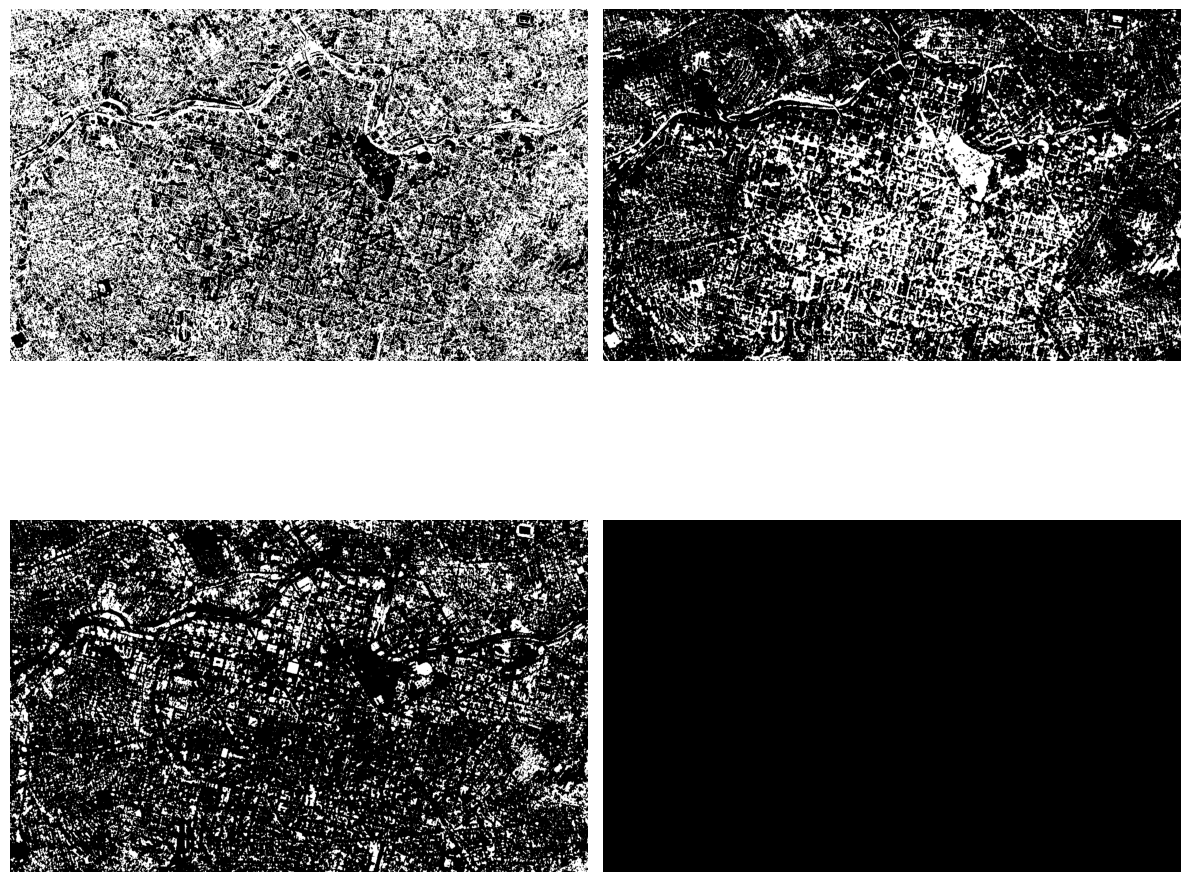

In [52]:
col = 2
row = (n_clusters+1)//col
fig, axes = plt.subplots(row,col, figsize=(12, 12))
for n, ax in enumerate(axes.flatten()):
    ax.imshow(result==[n], cmap='gray')
    ax.set_axis_off()

fig.tight_layout()

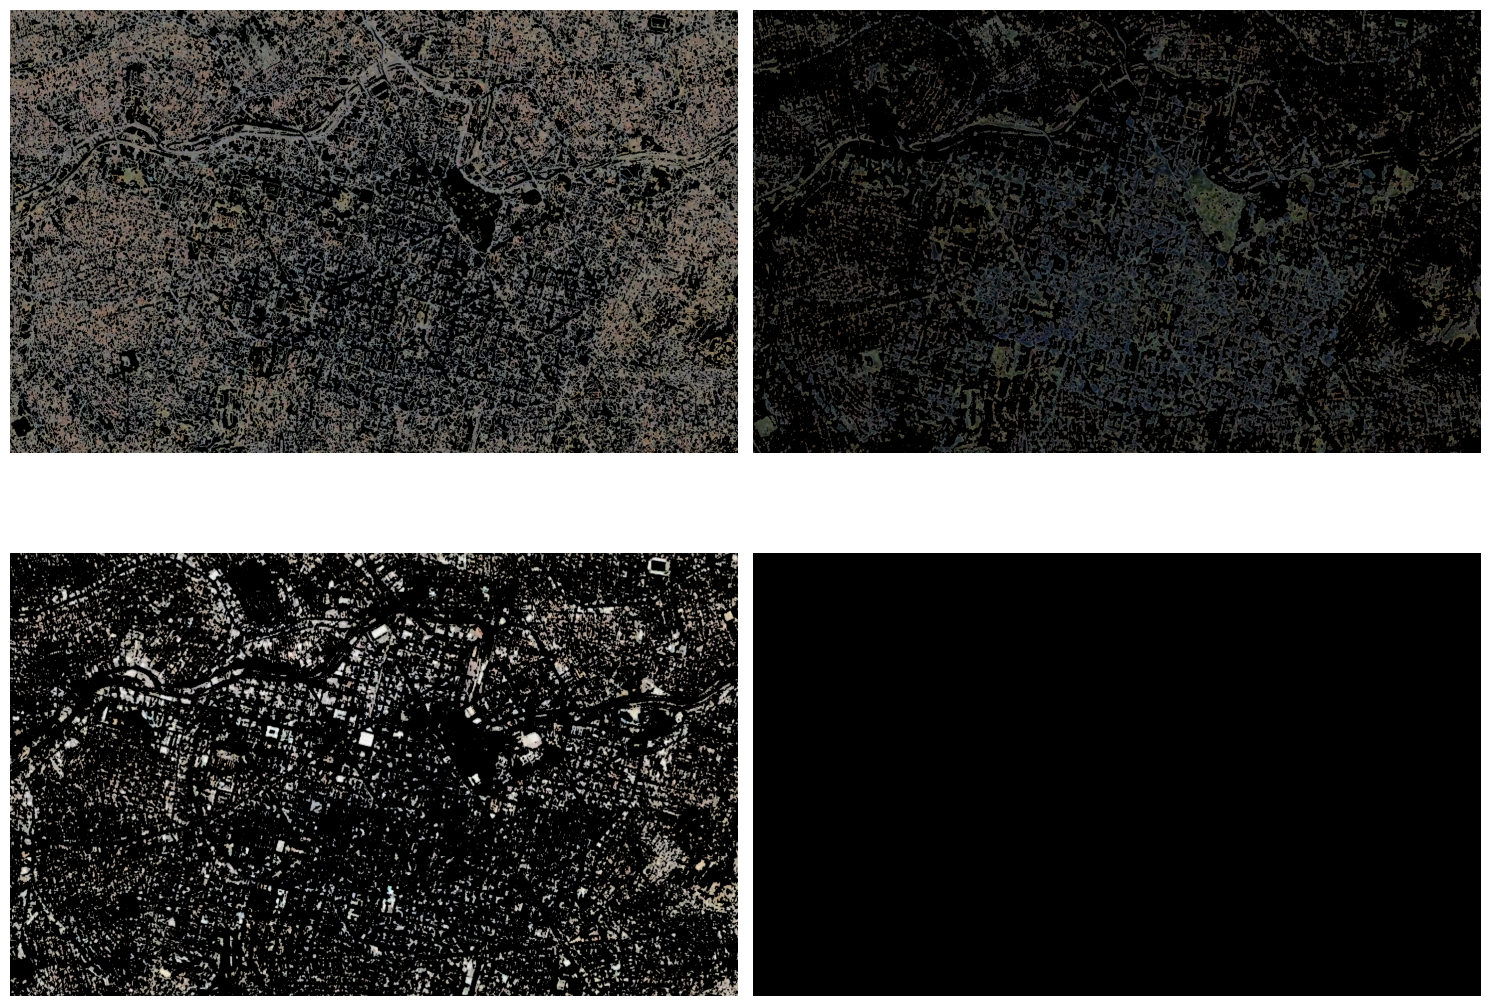

In [53]:
fig, axes = plt.subplots(row,col, figsize=(15, 12))
for i, ax in enumerate(axes.flatten()):
    castle = np.array(downsampled_image.convert('RGB'))
    castle[:, :, 0] = castle[:, :, 0]*(result==[i])
    castle[:, :, 1] = castle[:, :, 1]*(result==[i])
    castle[:, :, 2] = castle[:, :, 2]*(result==[i])
    ax.imshow(castle)
    ax.set_axis_off()
fig.tight_layout()